In [5]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

csvfile = "Data.csv"  #file name 


In [6]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,friction_patch,default_friction,loc_patch,size_patch,Rewards,Stop_Distance
0,0,74.44,0.53,0.8,28.36,11.46,-1092.16,-0.12
1,1,71.97,0.49,0.8,36.15,16.23,-1118.97,-0.35
2,2,68.03,0.46,0.8,95.40,29.30,-130.02,2.59
3,3,33.17,0.65,0.8,65.31,16.45,26.72,11.52
4,4,66.68,0.38,0.8,50.03,13.92,-26.43,3.77


In [7]:
data_test.loc[data_test['Stop_Distance'] <= 0, 'test'] = int(1)
data_test.loc[data_test['Stop_Distance'] > 0, 'test'] = int(0)
data_test.head()

,Episode,Kick_Speed,friction_patch,default_friction,loc_patch,size_patch,Rewards,Stop_Distance,test
0,0,74.44,0.53,0.8,28.36,11.46,-1092.16,-0.12,1.0
1,1,71.97,0.49,0.8,36.15,16.23,-1118.97,-0.35,1.0
2,2,68.03,0.46,0.8,95.40,29.30,-130.02,2.59,0.0
3,3,33.17,0.65,0.8,65.31,16.45,26.72,11.52,0.0
4,4,66.68,0.38,0.8,50.03,13.92,-26.43,3.77,0.0


Total number of episodes: 15000
Number of Pass: 14820
Number of fail: 179


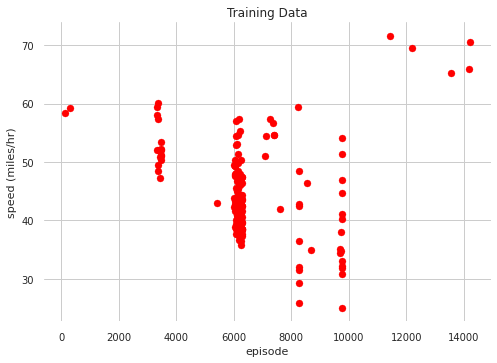

In [6]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=1;
end=15000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['Kick_Speed'].values.tolist()[start:end])
#speed=np.array(data_test['size_patch'].values.tolist()[start:end])
#speed=np.array(data_test['friction_patch'].values.tolist()[start:end])


indices = test == 0
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# Bad values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# Good values
#ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
#ax.set_ylim([0,75])
plt.xlabel('episode')
plt.ylabel('speed (miles/hr)')
ax.grid(True) 
plt.title('Training Data')
plt.savefig('training_data.png')
plt.show()

In [8]:
failed = data_test[data_test['Stop_Distance'] <= 0]
passed = data_test[data_test['Stop_Distance'] >0]

print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")

failed.to_csv("crashed_GMM.csv",index=False)
failed.head()

Size of crashes : 10
Size of success : 46
Percentage of crash cases:17.86 %
Percentage of not crashed cases:82.14 %


,Episode,Kick_Speed,friction_patch,default_friction,loc_patch,size_patch,Rewards,Stop_Distance,test
0,0,74.44,0.53,0.8,28.36,11.46,-1092.16,-0.12,1.0
1,1,71.97,0.49,0.8,36.15,16.23,-1118.97,-0.35,1.0
9,9,69.14,0.41,0.8,44.26,17.94,-1106.83,-0.19,1.0
22,22,72.58,0.60,0.8,35.87,22.76,-1113.16,-0.44,1.0
29,29,69.13,0.31,0.8,43.44,13.70,-1132.09,-0.33,1.0


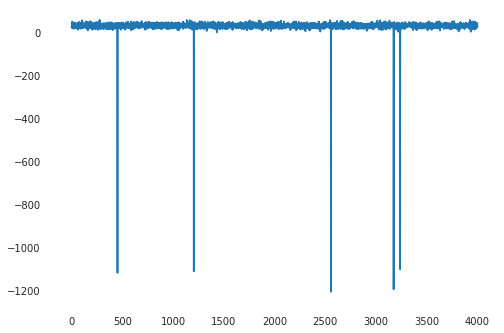

In [13]:
plt.plot(data_test["Rewards"].values.tolist()[start:end])

Failures:  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 30, 43, 49, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 9, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


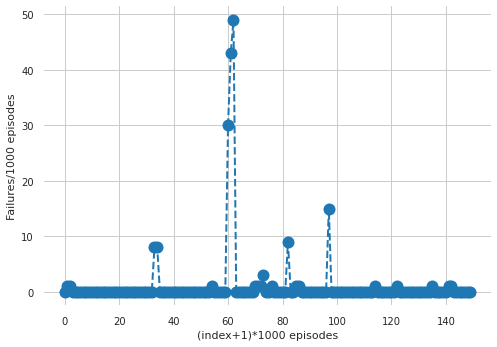

In [14]:
step=100
range_f=end/step
failure=[]
fig, ax = plt.subplots()
for i in range(int(range_f)):
    start=step*i
    episode=np.array(data_test['Episode'].values.tolist()[start:start+step])
    test=np.array(data_test['test'].values.tolist()[start:start+step])
    indices = test == 1
    failure.append(indices.sum())
print('Failures: ',failure)
ax.plot(failure,marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('(index+1)*1000 episodes')
plt.ylabel('Failures/1000 episodes')
ax.grid(True) 
plt.show()   

In [28]:
#data for AVF training:
iteration_start=11000
iteration_end=14300
stdfile='stdmean.npz'
data=data_test[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch","test"]][iteration_start:iteration_end]
std=np.std(data[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch"]].values,axis=0)
mean=np.mean(data[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch"]].values,axis=0)
np.savez(stdfile,std=std, mean=mean)
data[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch"]]=np.divide(np.subtract(data[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch"]],mean),std)
print('std is:',std)
print('Mean is:',mean)
data.head()

from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=10)
for train_indices, test_indices in k_fold.split(X):
    print('Train: %s | test: %s' % (train_indices, test_indices))
Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]

std is: [9.52627900e+02 9.23664393e+00 9.90999432e-02 1.20184497e+01
 4.97647344e+00]
Mean is: [1.26495000e+04 3.52625333e+01 5.99406061e-01 5.02503727e+01
 1.51369212e+01]


,Episode,Kick_Speed,friction_patch,loc_patch,size_patch,test
11000,-1.731526,-1.251811,0.409626,1.431102,-2.545361,0.0
11001,-1.730476,-0.100960,-0.397640,-0.325364,-1.576804,0.0
11002,-1.729427,-0.725646,0.510534,-1.466110,1.451445,0.0
11003,-1.728377,-0.553506,-0.094915,-0.187243,-0.134015,0.0
11004,-1.727327,-0.063068,-0.498548,-1.789779,0.655701,0.0


In [29]:
#AVF Training 


X=data[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch"]].values
print(X.shape)
Y=data["test"]
print(Y.shape)
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#test train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
x_train=X
y_train=Y
print(X[1,:].shape)

#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9999):
      print("\nReached 998% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Model

model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(5,)), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid )
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500, batch_size=8, callbacks=[callbacks]) ;


(3300, 5)
(3300,)
(5,)
Epoch 1/500
413/413 [==============================] - 1s 2ms/step - loss: 0.0632 - accuracy: 0.9973
Epoch 2/500
413/413 [==============================] - 1s 2ms/step - loss: 0.0137 - accuracy: 0.9985
Epoch 3/500
413/413 [==============================] - 1s 2ms/step - loss: 0.0100 - accuracy: 0.9985
Epoch 4/500
413/413 [==============================] - 1s 2ms/step - loss: 0.0074 - accuracy: 0.9985
Epoch 5/500
413/413 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9988
Epoch 6/500
413/413 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9988
Epoch 7/500
413/413 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 0.9991
Epoch 8/500
413/413 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 9/500
413/413 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 10/500
413/413 [==============================] - 1s 2ms/step 

In [23]:
results = model.evaluate(x_test, y_test, batch_size=16)
print('test loss, test acc:', results)

83/83 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9977
test loss, test acc: [0.033047664910554886, 0.9977272748947144]


In [30]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [31]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	saved_model.pb	variables


In [17]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [17]:
samples_per_iteration=2000
random_seed=np.random.randint(1,100000)
np.random.seed(random_seed)
candidate_initial_speed=[]
for i in range(samples_per_iteration): 
    #candidate_initial_speed =(9* np.random.randn(samples_per_iteration, 1) + 38).reshape(-1,1)
    candidate_initial_speed.append(np.random.normal(38,11))

candidate_initial_speed=np.array(candidate_initial_speed).reshape(-1,1)
Episode=3000*np.ones((samples_per_iteration,1)).reshape(-1,1)

data=np.concatenate((Episode,candidate_initial_speed),axis=1)
print(data.shape)
print('Data :',data)

container = np.load('stdmean9800.npz')
data_normalised=np.divide(np.subtract(data,container['mean']),container['std'])
#plt.plot(candidate_initial_speed)

(2000, 2)
Data : [[3000.           40.55732848]
 [3000.           27.25870435]
 [3000.           22.33549162]
 ...
 [3000.           14.07467256]
 [3000.           33.81445963]
 [3000.           41.825908  ]]


ValueError: operands could not be broadcast together with shapes (2000,2) (5,) 

In [18]:
predicted_y=new_model.predict(data_normalised,batch_size=8)
max_value=np.amax(predicted_y)
print(max_value)
print(predicted_y.shape)
array_position=np.where(predicted_y==max_value)[0]
print(array_position)
#print(predicted_y)
#print(np.sort(predicted_y, axis=None) )
data_final=np.concatenate((data[array_position,:],predicted_y[array_position,:]),axis=1)
print(data_final)

NameError: name 'data_normalised' is not defined

In [37]:
data_final[0][1]

74.04999012851141

In [25]:
a=[1 ,2, 3];
print(a[0:1])

[1]
